In [ ]:
#Season 1 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ripser as ripser
from persim import plot_diagrams
import nba_api as nba_api
import seaborn as sns

from matplotlib import _cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

from nba_api.stats.static import players
from nba_api.stats.endpoints import PlayerCareerStats
from nba_api.stats.endpoints import shotchartdetail

from ripser import ripser


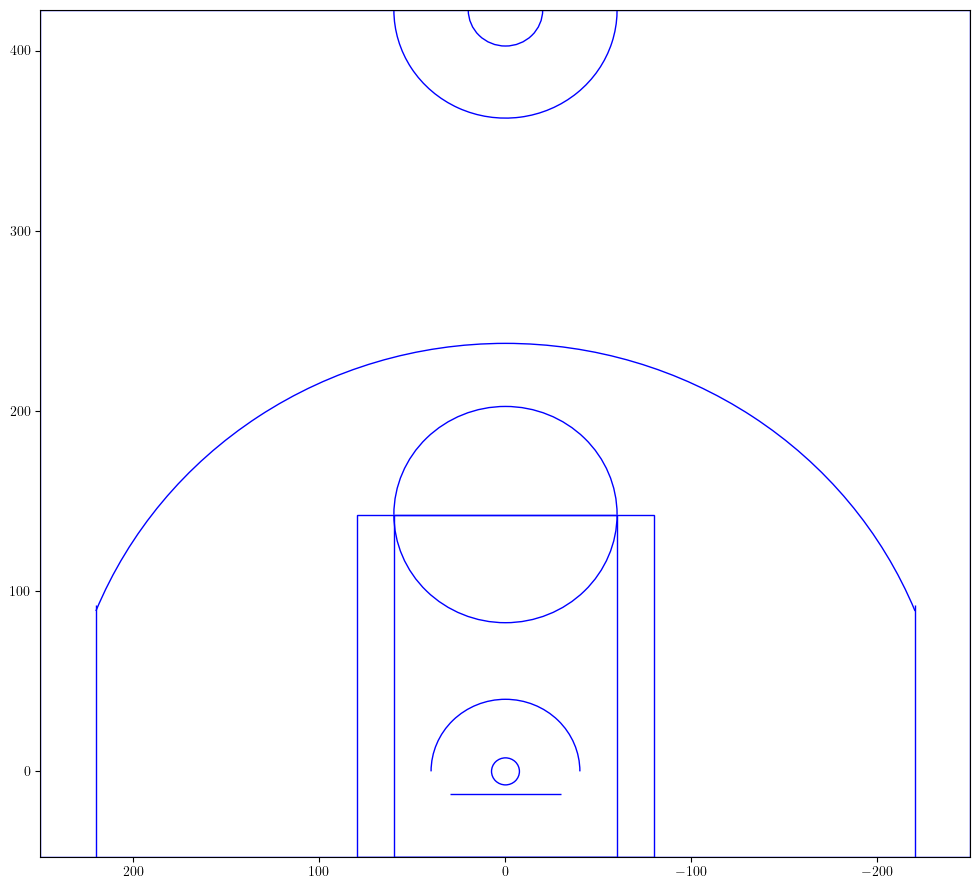

In [62]:
def draw_court(ax=None, color="blue", lw=1, outer_lines=False):
    
    if ax is None:
        ax = plt.gca()


    #basketball hoop
    hoop = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    

    #backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color,)

    #the paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    #free throw line
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)

    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)

    #Restricted Zone
    restricted = Arc((0,0), 80, 80,theta1=0, theta2=180, linewidth = lw, color=color)

    #three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0,0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    #center court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=100, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]
    

    outer_lines = True
    if outer_lines:
       outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color =color, fill=False)
       court_elements.append(outer_lines)
    
    for element in court_elements:
     ax.add_patch(element)



xlim = (-250, 250)
ylim = (422.5, -47.5)

ax = plt.gca()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim[::-1])
draw_court(ax)
plt.show


def shot_chart(data, title="", color="b", xlim= (-250,250), ylim=(422.5, -47.5), line_color="blue", court_color="white",
                court_lw=2, outer_lines=False, flip_court=False, gridsize=None, ax=None, despine=False):
   

    if ax is None:
      ax = plt.gca()

    if not flip_court:
      ax.set_xlim(xlim)
      ax.set_ylim(ylim)
    else:
      ax.set_xlim(xlim[::-1])
      ax.set_ylim(ylim[::-1])
    

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    #draw court usinf function
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
       ax.spines["top"].set_visible(False)
       ax.spines["bottom"].set_visible(False)
       ax.spines["right"].set_visible(False)
       ax.spines["left"].set_visible(False)
    return ax

In [64]:
#player ids
def get_player_id(player_name):
    player = [player for player in players.get_players() if player['full_name'] == player_name]
    return player[0]['id'] if player else None

lbj_id = get_player_id("LeBron James")
ewill_id = get_player_id("Eric Williams")
jmcinnis_id = get_player_id("Jeff McInnis")
bigz_id = get_player_id("Zydrunas Ilgauskas")
cboozer_id = get_player_id("Carlos Boozer")
# print(cboozer_id)

In [65]:
#season and team id
seasons = PlayerCareerStats(lbj_id)
player_log_data = seasons.get_data_frames()[0]
season_1_id = player_log_data["SEASON_ID"][0]
# print(season_1_id)

cavs_id = 1610612739

In [66]:
#season 1 game logs
lbj_1_gl = shotchartdetail.ShotChartDetail(player_id=lbj_id, season_nullable=season_1_id, team_id=cavs_id)
ewill_1_gl = shotchartdetail.ShotChartDetail(player_id=ewill_id, season_nullable=season_1_id, team_id=cavs_id)
jmcinnis_1_gl = shotchartdetail.ShotChartDetail(player_id=jmcinnis_id, season_nullable=season_1_id, team_id=cavs_id)
bigz_1_gl = shotchartdetail.ShotChartDetail(player_id=bigz_id, season_nullable=season_1_id, team_id=cavs_id)
cboozer_1_gl = shotchartdetail.ShotChartDetail(player_id=cboozer_id, season_nullable=season_1_id, team_id=cavs_id)


In [68]:
#season 1 data frames
lbj_1_df = lbj_1_gl.get_data_frames()[0]
ewill_1_df = ewill_1_gl.get_data_frames()[0]
jmcinnis_1_df = jmcinnis_1_gl.get_data_frames()[0]
bigz_1_df = bigz_1_gl.get_data_frames()[0]
cboozer_1_df = cboozer_1_gl.get_data_frames()[0]

In [69]:
#getting coords
lbj_1_xloc = lbj_1_df["LOC_X"]
lbj_1_yloc = lbj_1_df["LOC_Y"]

ewill_1_xloc = ewill_1_df["LOC_X"]
ewill_1_yloc = ewill_1_df["LOC_Y"]

jmcinnis_1_xloc = jmcinnis_1_df["LOC_X"]
jmcinnis_1_yloc = jmcinnis_1_df["LOC_Y"]

bigz_1_xloc = bigz_1_df["LOC_X"]
bigz_1_yloc = bigz_1_df["LOC_Y"]

cboozer_1_xloc = cboozer_1_df["LOC_X"]
cboozer_1_yloc = cboozer_1_df["LOC_Y"]

all_xloc = np.concatenate([lbj_1_df["LOC_X"], ewill_1_df["LOC_X"], jmcinnis_1_df["LOC_X"], bigz_1_df["LOC_X"], cboozer_1_df["LOC_X"]])
all_yloc = np.concatenate([lbj_1_df["LOC_Y"], ewill_1_df["LOC_Y"], jmcinnis_1_df["LOC_Y"], bigz_1_df["LOC_Y"], cboozer_1_df["LOC_Y"]])



In [70]:
#number arrays

lbj_1_array = np.array(
    [lbj_1_xloc, lbj_1_yloc]
).T

ewill_1_array = np.array(
    [ewill_1_xloc, ewill_1_yloc]
).T

jmcinnis_1_array = np.array(
    [jmcinnis_1_xloc, jmcinnis_1_yloc]
).T

bigz_1_array = np.array(
    [bigz_1_xloc, bigz_1_yloc]
).T

cboozer_1_array = np.array(
    [cboozer_1_xloc, cboozer_1_yloc]
).T

all_array = np.array(
    [all_xloc, all_yloc]
).T

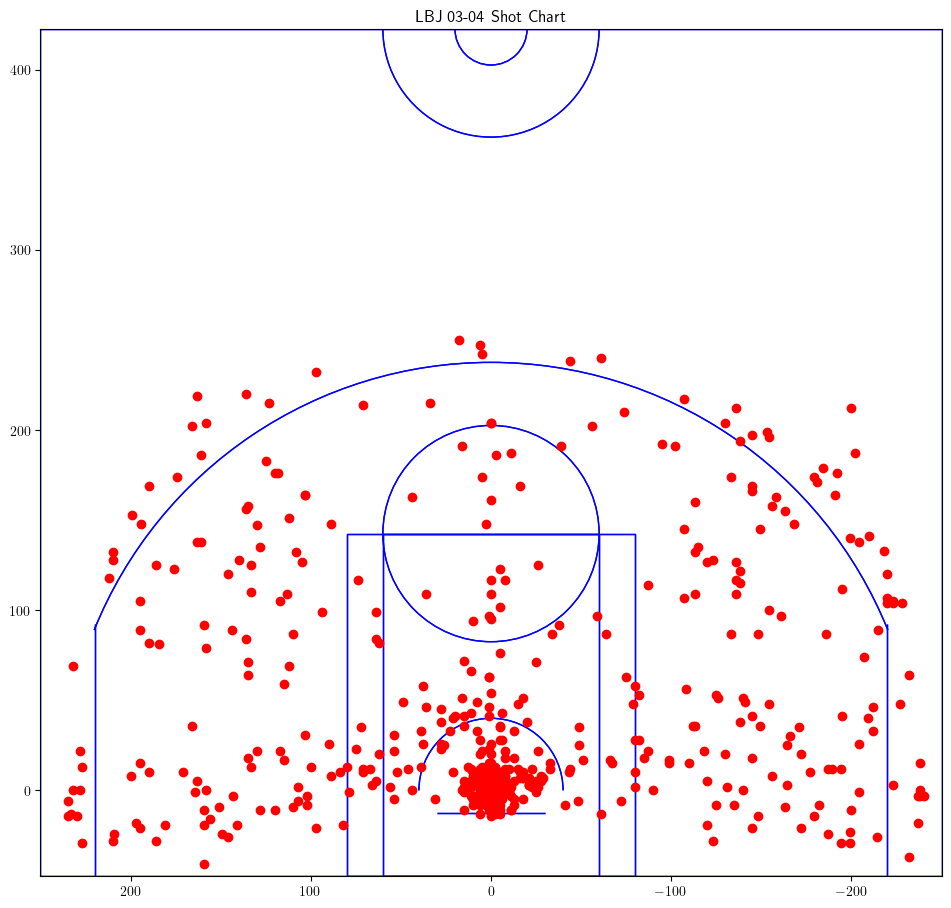

In [71]:
#LeBrons 03-04 shot chart
plt.scatter(
    lbj_1_xloc, lbj_1_yloc, s=10
)
plt.gca().set_aspect(1)
plt.title("LBJ 03-04 Shot Chart")


draw_court(ax=None, color="blue", lw=1, outer_lines=False)
xlim = (-250, 250)
ylim = (422.5, -47.5)

ax = plt.gca()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim[::-1])
draw_court(ax)
plt.show
ax.scatter(lbj_1_xloc,lbj_1_yloc, c="red")



plt.rcParams["figure.figsize"]= (12,11)
plt.show()

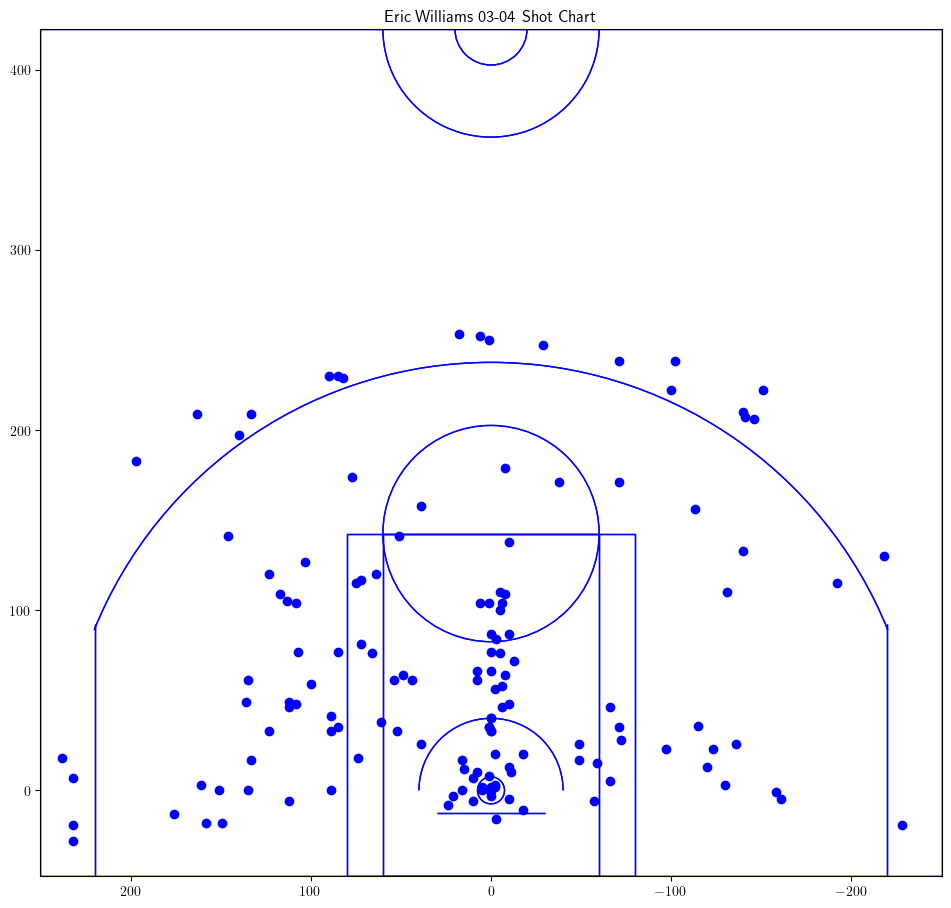

In [72]:
#Eric Williams 03-04 shot chart

plt.scatter(
    ewill_1_xloc, ewill_1_yloc, s=10
)
plt.gca().set_aspect(1)
plt.title("Eric Williams 03-04 Shot Chart")


draw_court(ax=None, color="blue", lw=1, outer_lines=False)
xlim = (-250, 250)
ylim = (422.5, -47.5)

ax = plt.gca()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim[::-1])
draw_court(ax)
plt.show
ax.scatter(ewill_1_xloc,ewill_1_yloc, c="blue")



plt.rcParams["figure.figsize"]= (12,11)
plt.show()

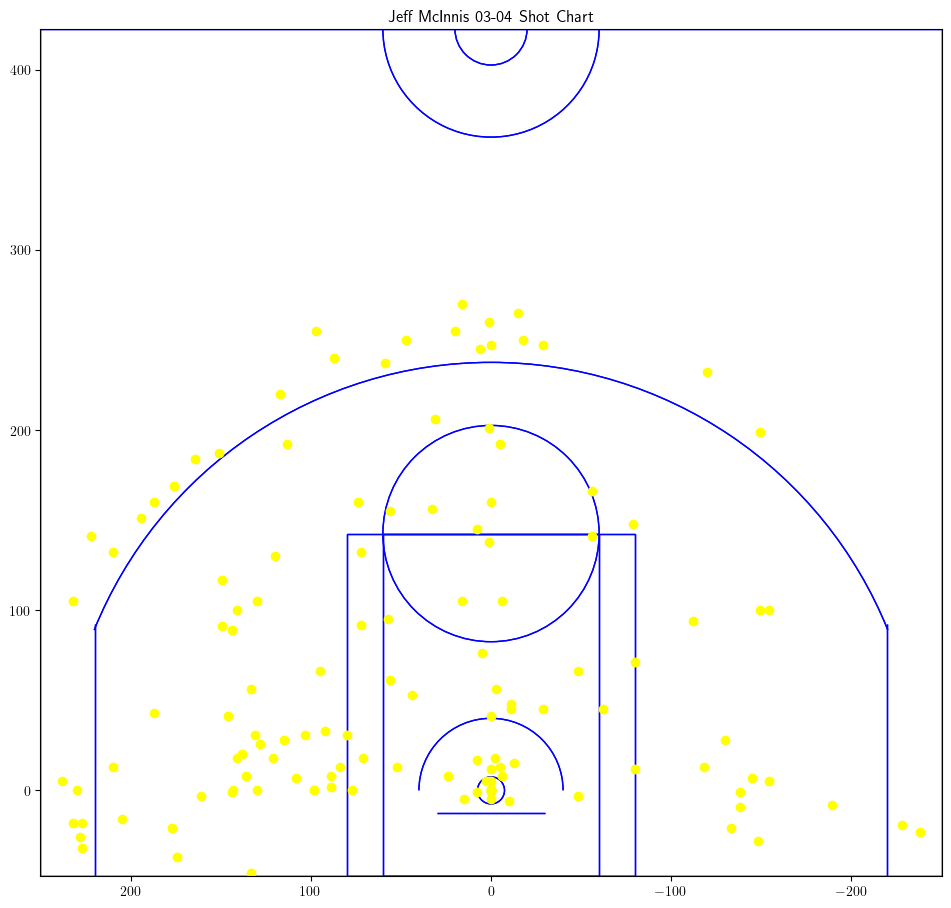

In [73]:
#Jeff McInnis 03-04 shot chart

plt.scatter(
    jmcinnis_1_xloc, jmcinnis_1_yloc, s=10
)
plt.gca().set_aspect(1)
plt.title("Jeff McInnis 03-04 Shot Chart")


draw_court(ax=None, color="blue", lw=1, outer_lines=False)
xlim = (-250, 250)
ylim = (422.5, -47.5)

ax = plt.gca()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim[::-1])
draw_court(ax)
plt.show
ax.scatter(jmcinnis_1_xloc,jmcinnis_1_yloc, c="yellow")



plt.rcParams["figure.figsize"]= (12,11)
plt.show()

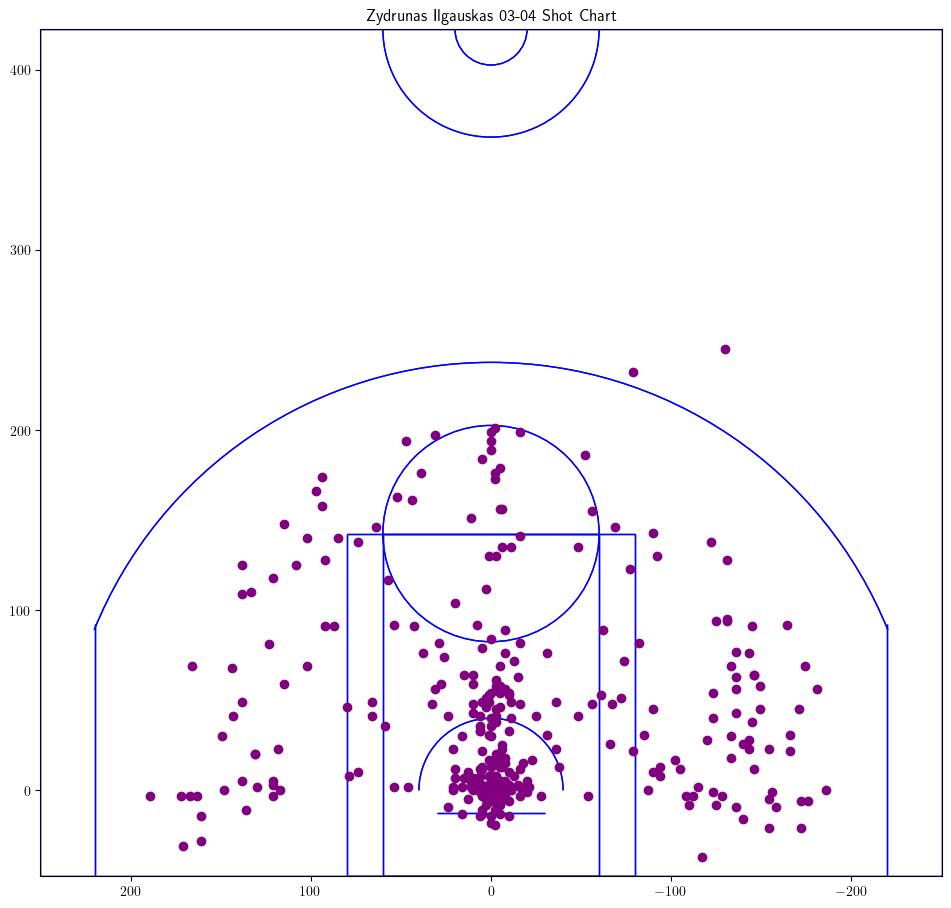

In [74]:
#Zydrunas Ilgauskas 03-04 shot chart

plt.scatter(
    bigz_1_xloc, bigz_1_yloc, s=10
)
plt.gca().set_aspect(1)
plt.title("Zydrunas Ilgauskas 03-04 Shot Chart")


draw_court(ax=None, color="blue", lw=1, outer_lines=False)
xlim = (-250, 250)
ylim = (422.5, -47.5)

ax = plt.gca()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim[::-1])
draw_court(ax)
plt.show
ax.scatter(bigz_1_xloc,bigz_1_yloc, c="purple")



plt.rcParams["figure.figsize"]= (12,11)
plt.show()

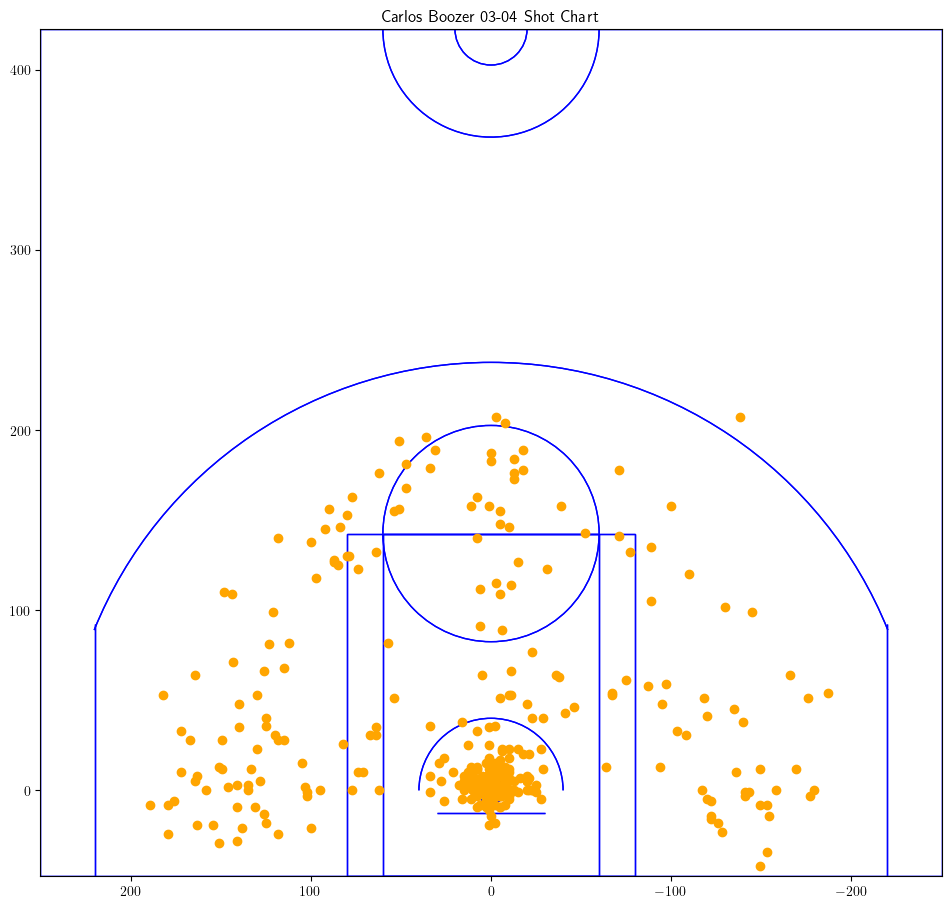

In [75]:
#Carlos Boozer 03-04 shot chart

plt.scatter(
    cboozer_1_xloc, cboozer_1_yloc, s=10
)
plt.gca().set_aspect(1)
plt.title("Carlos Boozer 03-04 Shot Chart")


draw_court(ax=None, color="blue", lw=1, outer_lines=False)
xlim = (-250, 250)
ylim = (422.5, -47.5)

ax = plt.gca()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim[::-1])
draw_court(ax)
plt.show
ax.scatter(cboozer_1_xloc,cboozer_1_yloc, c="orange")



plt.rcParams["figure.figsize"]= (12,11)
plt.show()

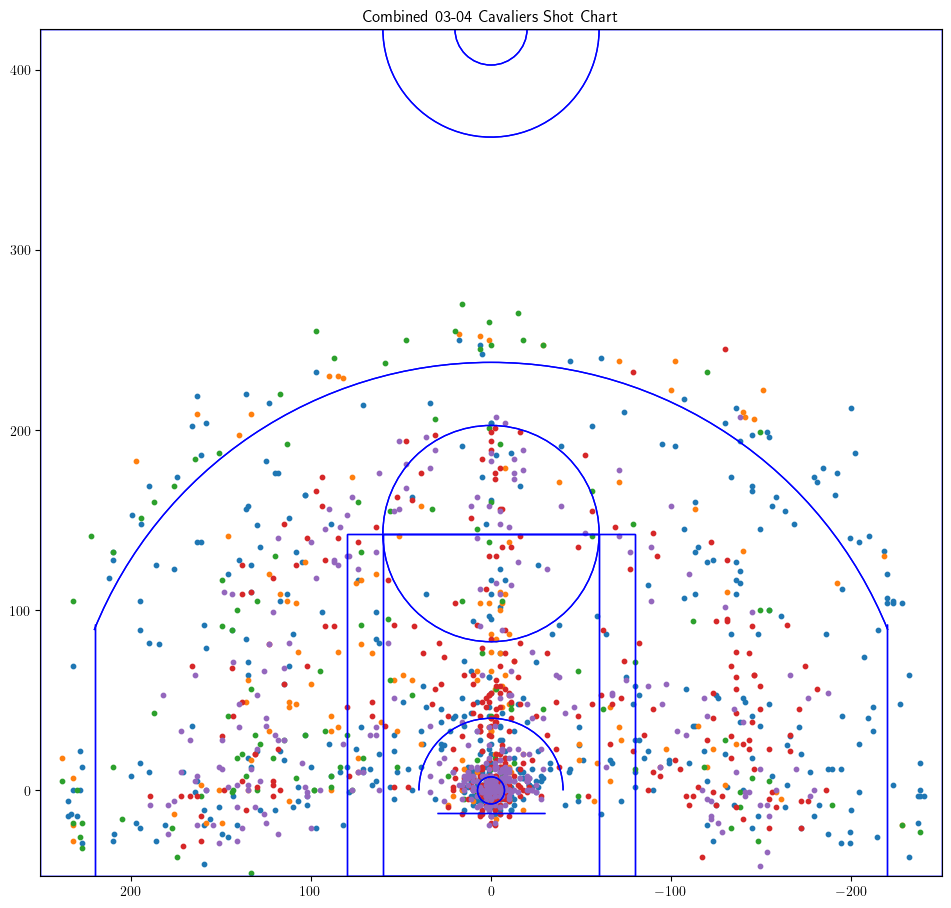

In [76]:
#Combined 03-04 shot chart
plt.scatter(
    lbj_1_xloc, lbj_1_yloc, s=10
)
plt.scatter(
    ewill_1_xloc, ewill_1_yloc, s=10
)
plt.scatter(
    jmcinnis_1_xloc, jmcinnis_1_yloc, s=10
)
plt.scatter(
    bigz_1_xloc, bigz_1_yloc, s=10
)
plt.scatter(
    cboozer_1_xloc, cboozer_1_yloc, s=10
)


plt.gca().set_aspect(1)
plt.title("Combined 03-04 Cavaliers Shot Chart")


draw_court(ax=None, color="blue", lw=1, outer_lines=False)
xlim = (-250, 250)
ylim = (422.5, -47.5)
ax = plt.gca()
ax.set_xlim(xlim[::-1])
ax.set_ylim(ylim[::-1])
draw_court(ax)
plt.rcParams["figure.figsize"]= (12,11)
plt.show()


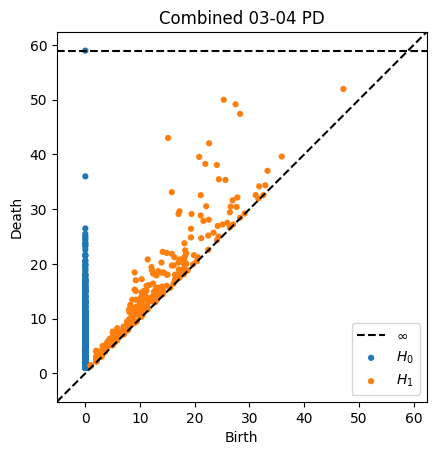

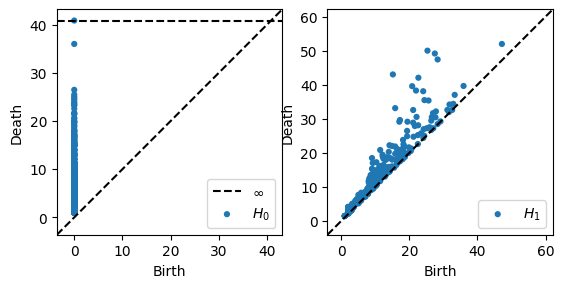

In [81]:
#combined persistence diagram for 03-04 season
plt.title("Combined 03-04 PD")
dgms = ripser(all_array)['dgms']
plot_diagrams(dgms, show=True)
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(121))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(122))

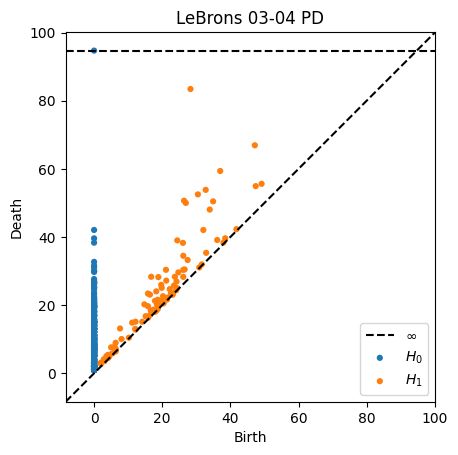

In [85]:
#LeBrons 03-04 PD

plt.title("LeBrons 03-04 PD")
dgms = ripser(lbj_1_array)['dgms']
plot_diagrams(dgms, show=True)